In [33]:
# 라이브러리 가저오기
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#그래프를 인라인으로 표시 과거 Jupyter Notebook에서 현재 창에 시각화하기 위해 써주던 코드인데, 지금은 그게 기본이라 쓸 필요 없음
%matplotlib inline

In [34]:
df = pd.read_csv("C:/Users/전대혁/TEST_Lab/machine-learning-master/data/csv/basketball_stat.csv")

In [35]:
df

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


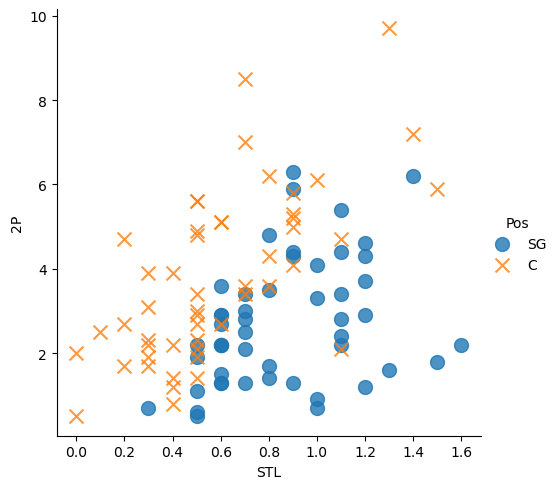

In [36]:
# x에 스틸, y에 2점슛 데이터 시각화
sns.lmplot(x='STL',y='2P', data=df, fit_reg=False, # x축, y축, 데이터, 노 라인
          scatter_kws={"s": 100}, # 좌표 상의 점의 크기
          markers=["o","x"],
          hue="Pos") # 예측값

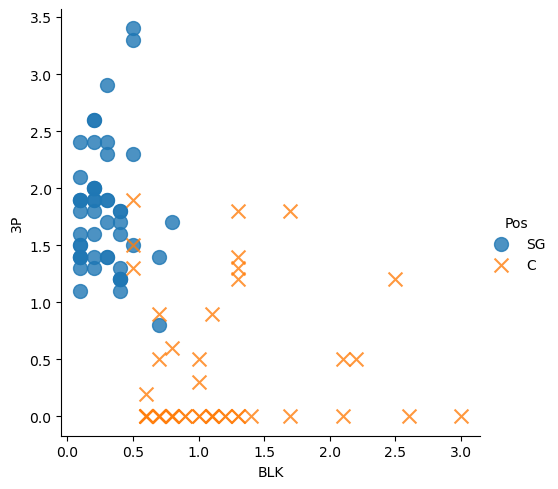

In [37]:
# x에 블록킹, y에 3점슛 데이터 시각화
sns.lmplot(x='BLK', y='3P', data=df, fit_reg=0,
           scatter_kws={"s": 100},
           markers=["o","x"],
           hue="Pos")

In [38]:
# 분별력이 없는 특징(feature)을 데이터에서 제거
df.drop(['2P','AST','STL'],axis=1, inplace=True)

In [39]:
# 데이터 프레임 조회
df.head(0)

,Player,Pos,3P,TRB,BLK


In [40]:
# sklearn의 train_test_split을 사용하여 코드 한 줄로 손쉽게 데이터를 나누기 위해 라이브러리 가져오기
from sklearn.model_selection import train_test_split

In [41]:
# 다듬어진 데이터에서 20%를 테스트 데이터로 분류
train, test = train_test_split(df, test_size=0.2)

In [42]:
# 학습 데이터 퍼센트 확인
train.shape[0] 

80

In [43]:
# 테스트 데이터 퍼센트 확인
test.shape[0]

20

In [44]:
# knn 라이브러리 추기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 최적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를 3부터 학습 데이터 절반까지 지정 
max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2): 
    k_list.append(i)

cross_validation_scores = []
x_train = train[['3P','BLK','TRB']] 
y_train = train[['Pos']]

# 교차 검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 선정
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train,  y_train.values.ravel(), 
                             cv=10, scoring = 'accuracy')  
    cross_validation_scores.append(scores.mean())
    
cross_validation_scores

C:\anaconda3\envs\yolotf\lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\envs\yolotf\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\anaconda3\envs\yolotf\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\anaconda3\envs\yolotf\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\anaconda3\envs\yolotf\lib\site-packages\sklearn\utils\_response.py", line 85, in _get_response_values
    y_pred = prediction_method(X)
  File "C:\anaconda3\envs\yolotf\lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
  File

[0.9375,
 0.925,
 0.9125,
 0.9125,
 0.925,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9,
 0.9,
 0.8875,
 0.875,
 0.8625,
 0.8625,
 0.85,
 0.85,
 nan,
 nan]

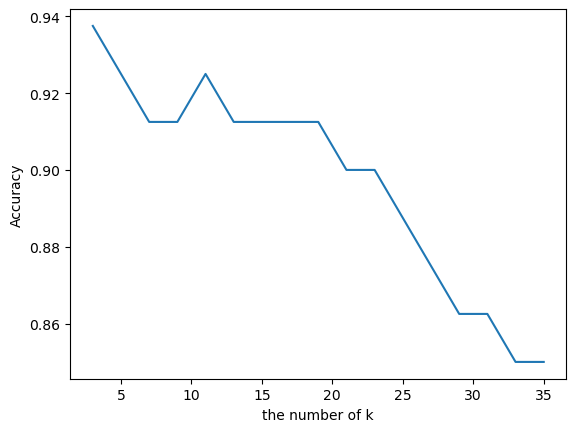

In [45]:
# k에 따른 정확도 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [46]:
# 가장 예측률이 높은 k 선정
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print("The best number of k : " + str(k))

The best number of k : 3


In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

# 학습에 사용될 속성 지정
x_train = train[['3P','BLK','TRB']]
# 선수 포지션을 예측할 값 지정
y_train = train[['Pos']]

# kNN 모델 학습
knn.fit(x_train, y_train.values.ravel())

# 테스트 데이터에서 분류를 위해 사용될 속성 지정
x_test = test[['3P','BLK','TRB']]

# 선수 포지션에 대한 정답 지정
y_test = test[['Pos']]

# 테스트 시작
pred = knn.predict(x_test)

# 모델 예측 정확도(accuracy) 출력
print("accuracy : "+str( accuracy_score(y_test.values.ravel(), pred)) )

accuracy : 0.85


In [48]:
# 실제 값과 예측된 값 시각화
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()})
comparison

,prediction,ground_truth
0,SG,C
1,C,C
2,C,SG
3,C,C
4,SG,SG
5,SG,SG
6,C,C
7,C,C
8,C,C
9,SG,SG
